Import All Neccessary Libraries

In [14]:
import os
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
from scipy.signal import convolve
from AccelerometerRecording import AccelerometerRecording
from TwincatRecording import TwincatRecording
import matplotlib.pyplot as plt
import seaborn as sns
from TwinCAT_two_variable_plot import TwinCAT_two_variable_plot
from Accelerometer_two_variable_plot import Accelerometer_two_variable_plot

Creating an Object to Store all the TwinCAT Data from a specified folder

In [15]:
folder = r'/home/jamie/Documents/Accelerometer_vs_TwinCAT/Accelerometer-vs-TwinCAT/SG_Slide_Test_accelerometer_vs_twinCAT/reversing_sequences/TwinCAT'

TwinCAT_dfs = {}
TwinCAT_velocities = []

for filename in os.listdir(folder):

    if filename.endswith('.csv'):

        filepath = os.path.join(folder, filename)
        
        specific_velocity = float(TwincatRecording(filepath).velocity)
        TwinCAT_dfs[specific_velocity] = TwincatRecording(filepath)
        TwinCAT_velocities.append(specific_velocity)

for velocity,df in sorted(TwinCAT_dfs.items()):
    print('Test at {velocity}mm/s:\t'.format(velocity=velocity),df)

TwinCAT_velocities.sort()
TwinCAT_dfs[TwinCAT_velocities[0]].data.head()



Test at 500.0mm/s:	 This TwinCAT recording is at 500mm/s from 150.0mm to 850.0mm along the slide. For Debugging rising edge:152.5mm
Test at 2000.0mm/s:	 This TwinCAT recording is at 2000mm/s from 150.0mm to 850.0mm along the slide. For Debugging rising edge:152.5mm
Test at 4000.0mm/s:	 This TwinCAT recording is at 4000mm/s from 150.0mm to 850.0mm along the slide. For Debugging rising edge:152.5mm


,Time (ms),ActCurr,ActPos,ActVelo,actCurrent,actPosition,actVelocity,SetCurr,ActCurr (1),ActHwPos,ActFollowingError,SetAccItp,Velocity m/s,Time (s)
0,0.00,0,152.501873,181.082737,0,152.544375,0,1.084487,0,152.544375,-0.013756,8400.0,0.181083,0.00000
1,0.25,0,152.552514,185.856359,0,152.594952,0,1.083020,0,152.594952,-0.016511,8450.0,0.185856,0.00025
2,0.50,0,152.603295,189.694108,0,152.645851,0,1.073110,0,152.645851,-0.019615,8500.0,0.189694,0.00050
3,0.75,0,152.654834,193.352476,0,152.698025,0,1.054524,0,152.698025,-0.023054,8550.0,0.193352,0.00075
4,1.00,0,152.705350,195.288887,0,152.747685,0,1.028524,0,152.747685,-0.026617,8600.0,0.195289,0.00100


Creating an Object to Store all the Accelerometer Data from a specified folder

In [16]:
folder = r'/home/jamie/Documents/Accelerometer_vs_TwinCAT/Accelerometer-vs-TwinCAT/SG_Slide_Test_accelerometer_vs_twinCAT/reversing_sequences/Accelerometer'

Accelerometer_dfs = {}
Accelerometer_velocities = []

for filename in os.listdir(folder):

    if filename.endswith('.csv'):

        filepath = os.path.join(folder, filename)
        
        specific_velocity = float(AccelerometerRecording(filepath).velocity)
        Accelerometer_dfs[specific_velocity] = AccelerometerRecording(filepath)
        Accelerometer_velocities.append(specific_velocity)

for velocity,df in sorted(Accelerometer_dfs.items()):
    print('Test at {velocity}mm/s:\t'.format(velocity=velocity),df)

Accelerometer_velocities.sort()
Accelerometer_dfs[Accelerometer_velocities[0]].data.head(100)

Test at 500.0mm/s:	 This Accelerometer recording is at 500mm/s from 150.0mm to 850.0mm along the slide.
Test at 2000.0mm/s:	 This Accelerometer recording is at 2000mm/s from 150.0mm to 850.0mm along the slide.
Test at 4000.0mm/s:	 This Accelerometer recording is at 4000mm/s from 150.0mm to 850.0mm along the slide.


,Time h/m/s/ms,Device Name,Acceleration X(g),Acceleration Y(g),Acceleration Z(g),Angular velocity X(°/s),Angular velocity Y(°/s),Angular velocity Z(°/s),Angle X(°),Angle Y(°),...,Magnetic field Z(ʯt),Temperature(℃),Quaternions 0(),Quaternions 1(),Quaternions 2(),Quaternions 3(),Unnamed: 19,Elapsed Time (s),Elapsed Time (ms),Acceleration m/s^2
0,1900-01-01 14:19:16.091,WT901BLE67(10961A5BCFA2),0.848,-0.427,1.360,2.502,0.244,2.441,0.621,1.230,...,0.008,23.23,0.99988,0.00571,0.01059,-0.00381,NaN,0.000,0.0,8.31888
4,1900-01-01 14:19:16.092,WT901BLE67(10961A5BCFA2),0.829,-0.127,1.215,3.601,1.038,0.244,0.599,1.187,...,0.008,23.23,0.99988,0.00571,0.01059,-0.00381,NaN,0.001,1.0,8.13249
8,1900-01-01 14:19:16.119,WT901BLE67(10961A5BCFA2),1.247,-0.029,1.048,0.610,0.061,-0.854,0.566,1.060,...,0.008,23.23,0.99988,0.00571,0.01059,-0.00381,NaN,0.028,28.0,12.23307
14,1900-01-01 14:19:16.120,WT901BLE67(10961A5BCFA2),0.313,-0.035,0.986,0.122,0.061,0.061,0.516,0.742,...,0.008,23.23,0.99988,0.00571,0.01059,-0.00381,NaN,0.029,29.0,3.07053
16,1900-01-01 14:19:16.209,WT901BLE67(10961A5BCFA2),0.039,0.038,0.986,-0.183,-0.122,0.061,0.500,0.632,...,0.008,23.23,0.99988,0.00571,0.01059,-0.00381,NaN,0.118,118.0,0.38259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,1900-01-01 14:19:17.772,WT901BLE67(10961A5BCFA2),0.027,-0.062,1.047,1.221,0.000,0.854,-0.291,1.187,...,0.008,23.23,0.99994,-0.00272,0.00256,-0.00204,NaN,1.681,1681.0,0.26487
344,1900-01-01 14:19:17.799,WT901BLE67(10961A5BCFA2),0.466,-0.080,1.062,-1.465,-0.549,-1.770,-0.308,1.241,...,0.008,23.23,0.99994,-0.00272,0.00256,-0.00204,NaN,1.708,1708.0,4.57146
348,1900-01-01 14:19:17.800,WT901BLE67(10961A5BCFA2),0.061,0.124,0.852,0.000,2.014,4.761,-0.346,1.423,...,0.008,23.23,0.99994,-0.00272,0.00256,-0.00204,NaN,1.709,1709.0,0.59841
350,1900-01-01 14:19:17.801,WT901BLE67(10961A5BCFA2),-0.464,0.104,0.926,0.000,-0.366,-0.610,-0.374,1.505,...,0.008,23.23,0.99994,-0.00272,0.00256,-0.00204,NaN,1.710,1710.0,-4.55184


In [17]:

for velocity in TwinCAT_velocities:
    length_of_kernel = 200
    TwinCAT_dfs[velocity].calculate_acceleration(length_of_kernel)
    TwinCAT_dfs[velocity].convolve_acceleration(length_of_kernel)

for velocity in Accelerometer_velocities:
    length_of_kernel = 4
    Accelerometer_dfs[velocity].interpolate_acceleration()
    Accelerometer_dfs[velocity].calculate_velocity()
    Accelerometer_dfs[velocity].convolve_velocity(length_of_kernel)


TwinCAT Graphing Function - Before Convolving the Signals

In [18]:
TwinCAT_two_variable_plot(TwinCAT_velocities=TwinCAT_velocities,TwinCAT_dfs=TwinCAT_dfs,data_type_one='Acceleration m/s^2',data_type_two='Velocity m/s')

TwinCAT Graphing Function - After Convolution

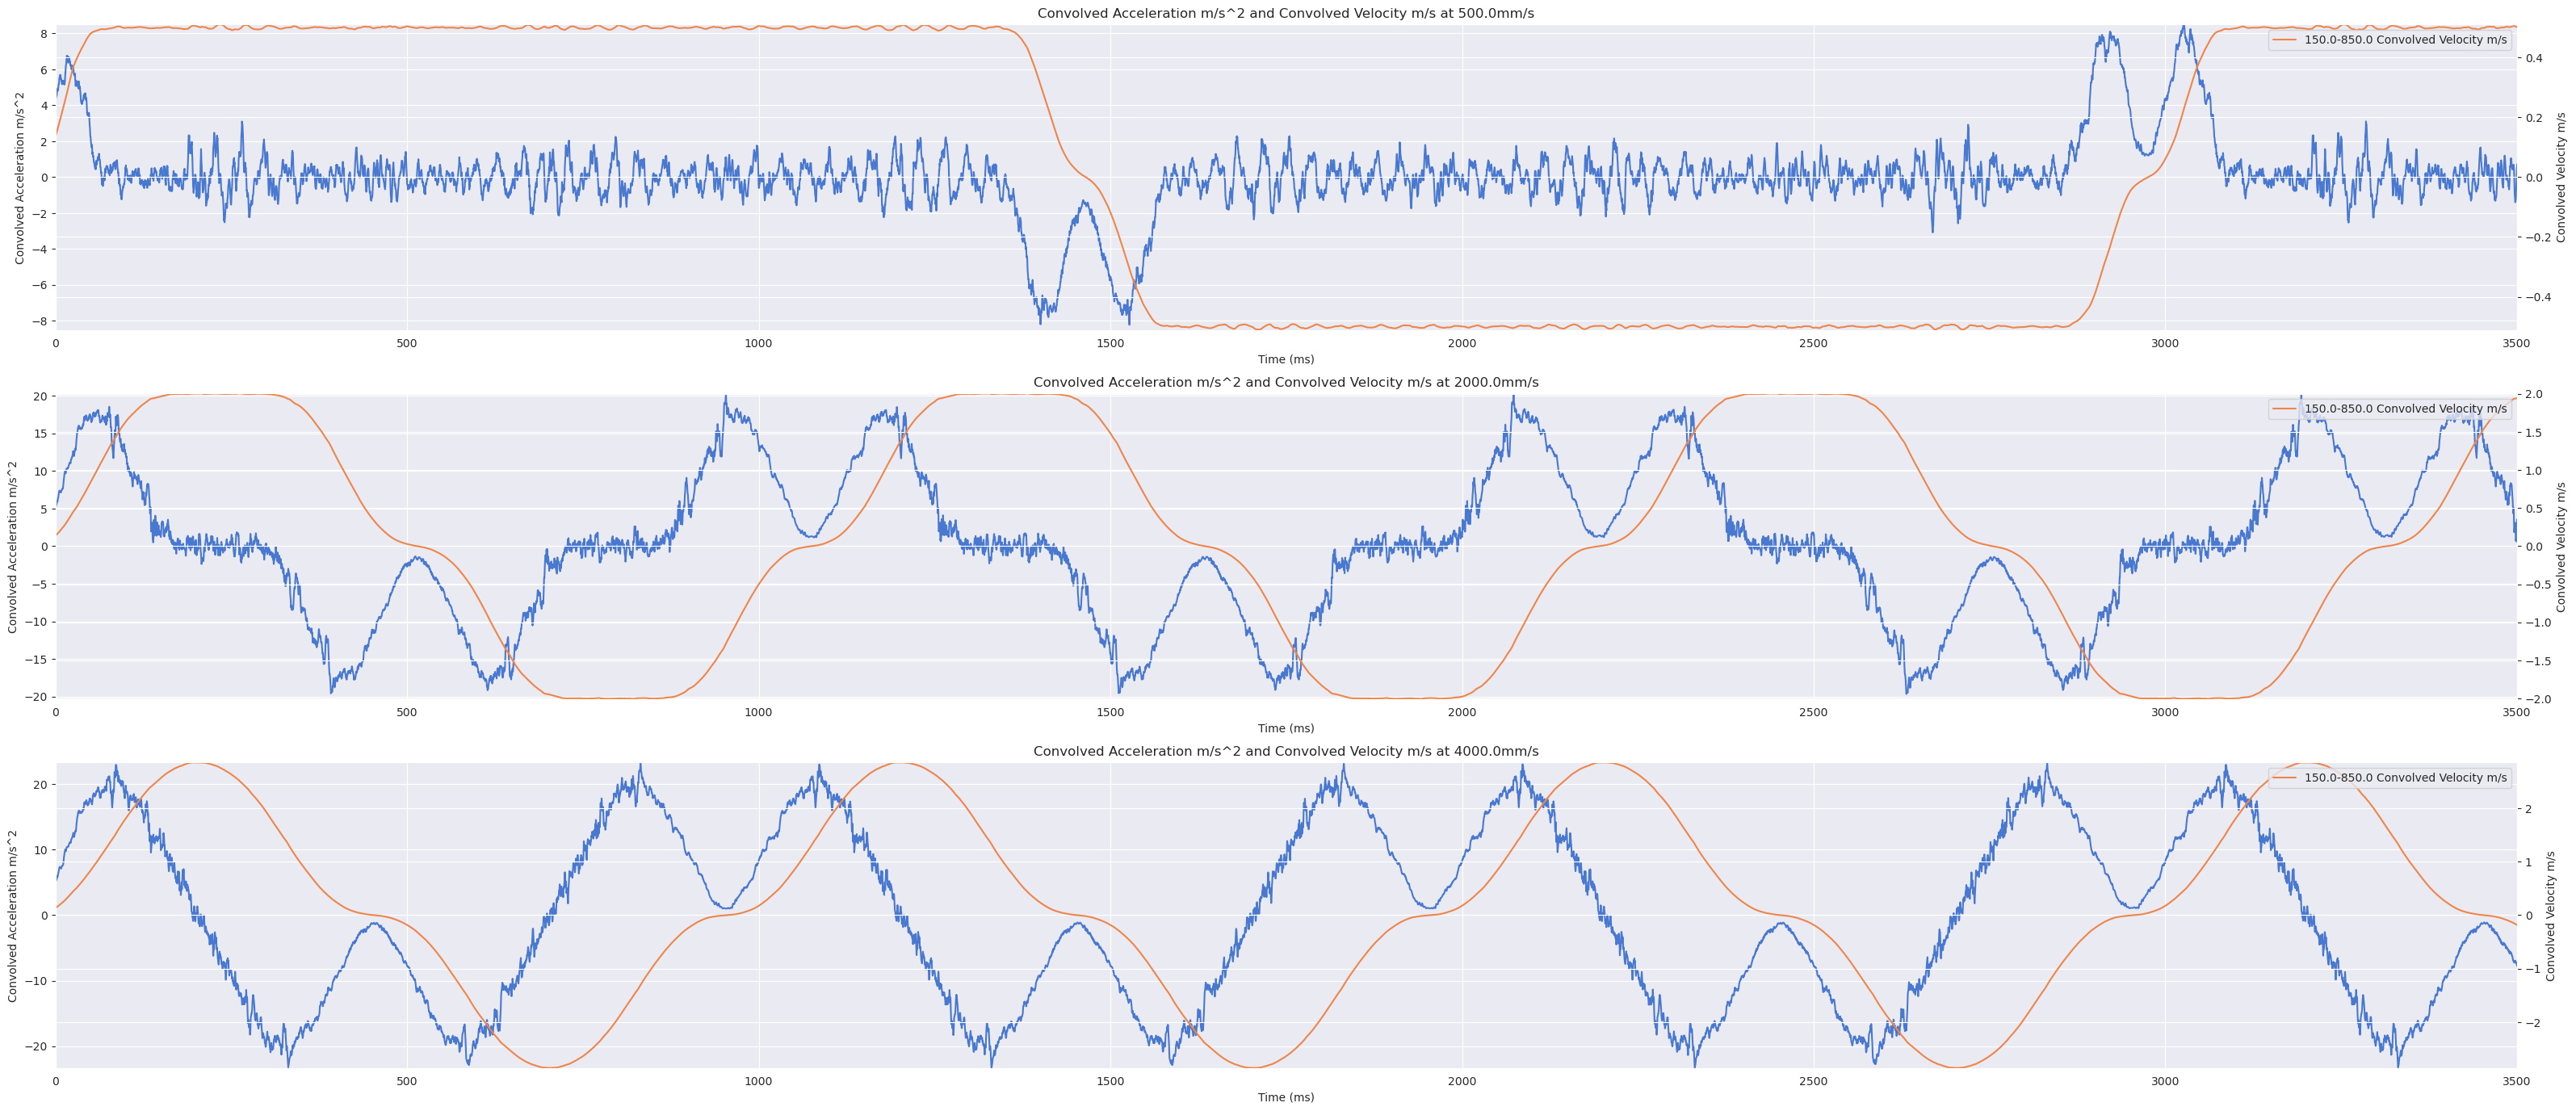

In [ ]:
TwinCAT_two_variable_plot(TwinCAT_velocities=TwinCAT_velocities,TwinCAT_dfs=TwinCAT_dfs,data_type_one='Convolved Acceleration m/s^2',data_type_two='Convolved Velocity m/s')

Accelerometer Graphing Function - Initial Readings

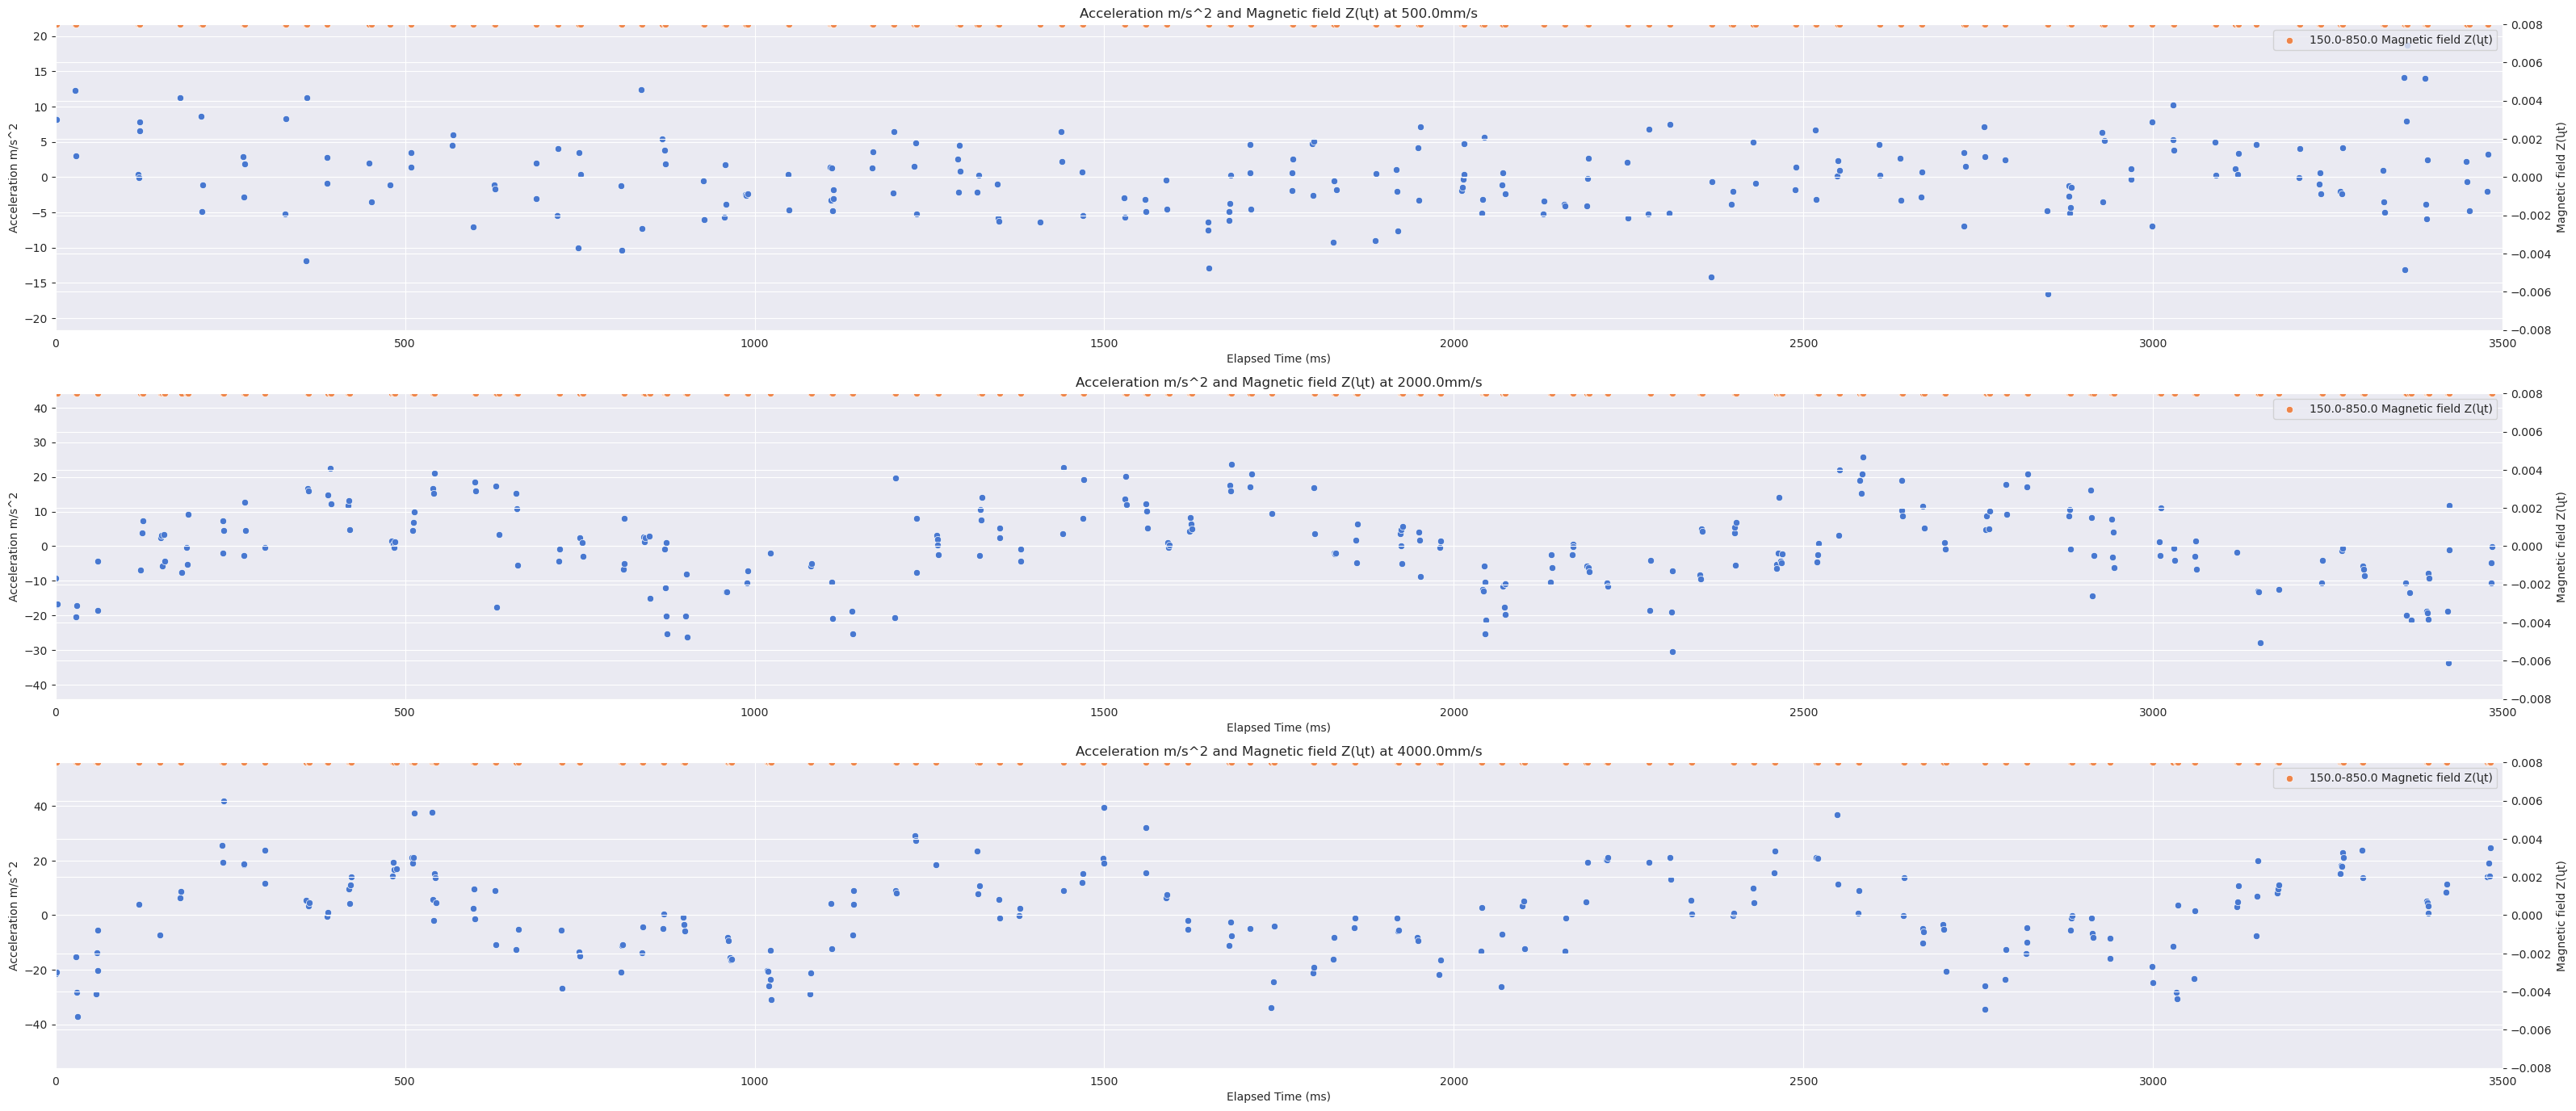

In [ ]:
Accelerometer_two_variable_plot(Accelerometer_velocities=Accelerometer_velocities,Accelerometer_dfs=Accelerometer_dfs)

Accelerometer Graphing Function - Interpolating to the same frequecy as TwinCAT and Integrating to find the Velocity 

AttributeError: 'AccelerometerRecording' object has no attribute 'TC_data'

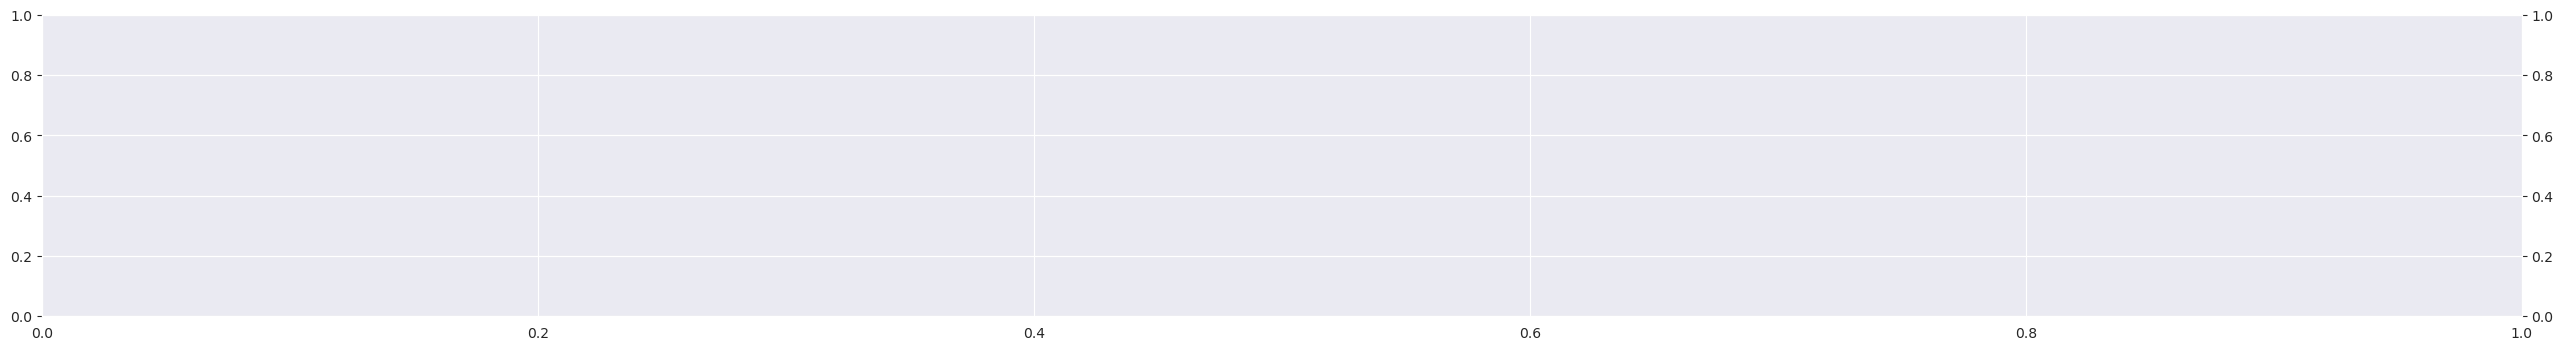

In [ ]:
Accelerometer_two_variable_plot(Accelerometer_velocities=Accelerometer_velocities,Accelerometer_dfs=Accelerometer_dfs,TC=True,data_type_one='Acceleration m/s^2',data_type_two='Convolved Velocity m/s')

Plotting Accelerometer vs TwinCAT Velocity

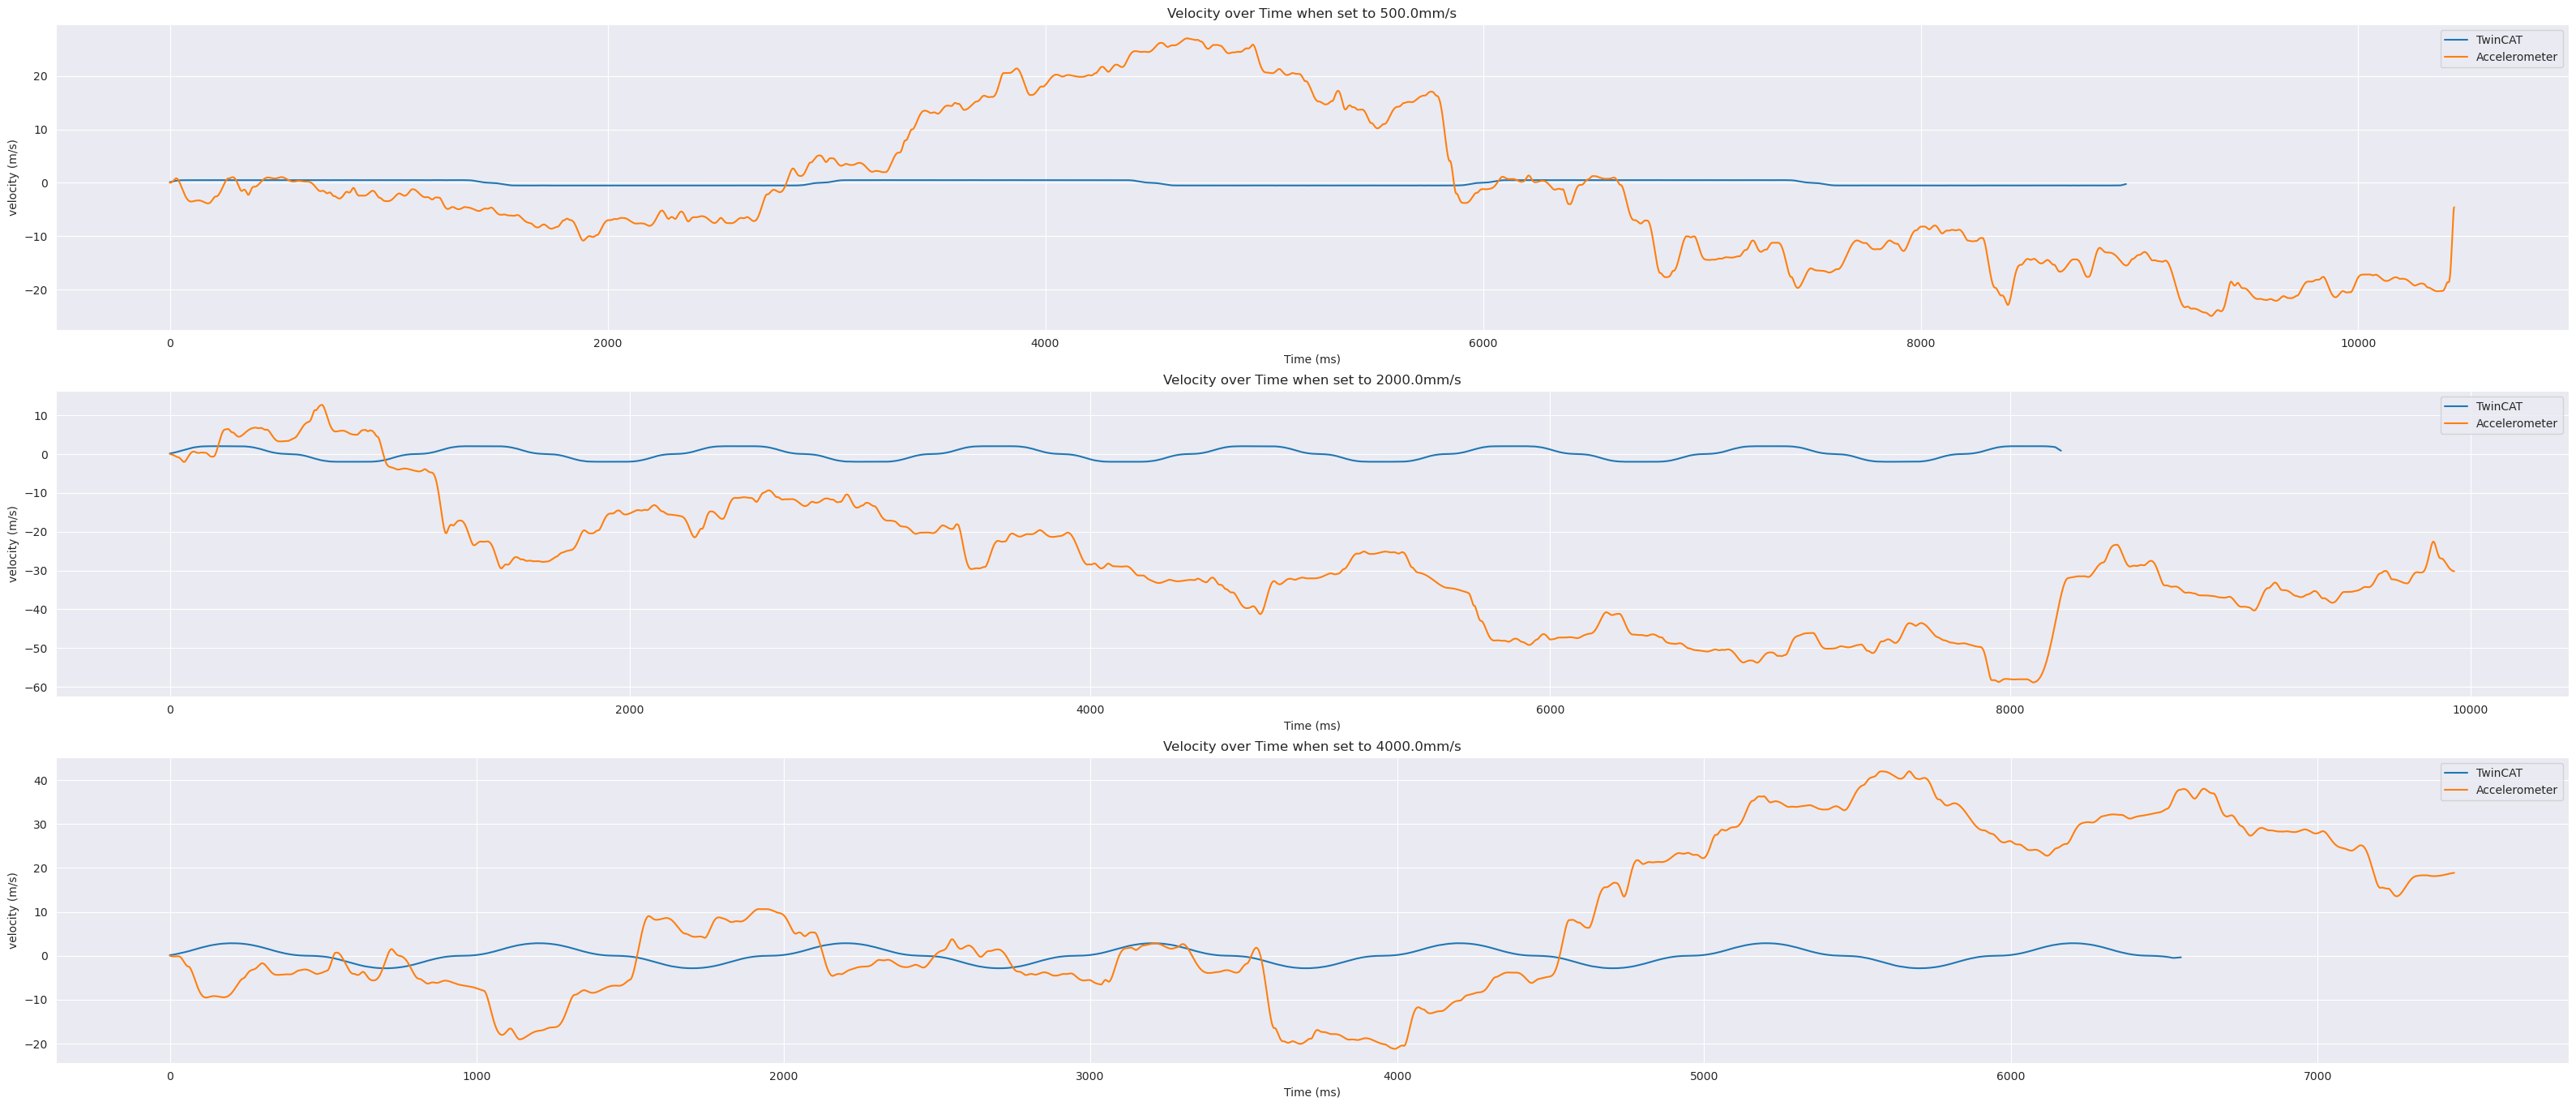

In [ ]:
scaling_factor = 2.5
plt.figure(figsize=(16*scaling_factor,9*scaling_factor))

for i,velocity in enumerate(TwinCAT_velocities):
    plt.subplot(len(TwinCAT_velocities)+1,1,i+1)
    sns.lineplot(data=TwinCAT_dfs[velocity].data, x="Time (ms)", y='Convolved Velocity m/s',label = 'TwinCAT')
    sns.lineplot(data=Accelerometer_dfs[velocity].TC_data,x='Time (ms)', y='Velocity m/s',label = 'Accelerometer')
    
    plt.ylabel("velocity (m/s)")
    plt.xlabel("Time (ms)")
    plt.legend()
    plt.title('Velocity over Time when set to {velocity}mm/s'.format(velocity=velocity))

Plotting Accelerometer vs TwinCAT Acceleration

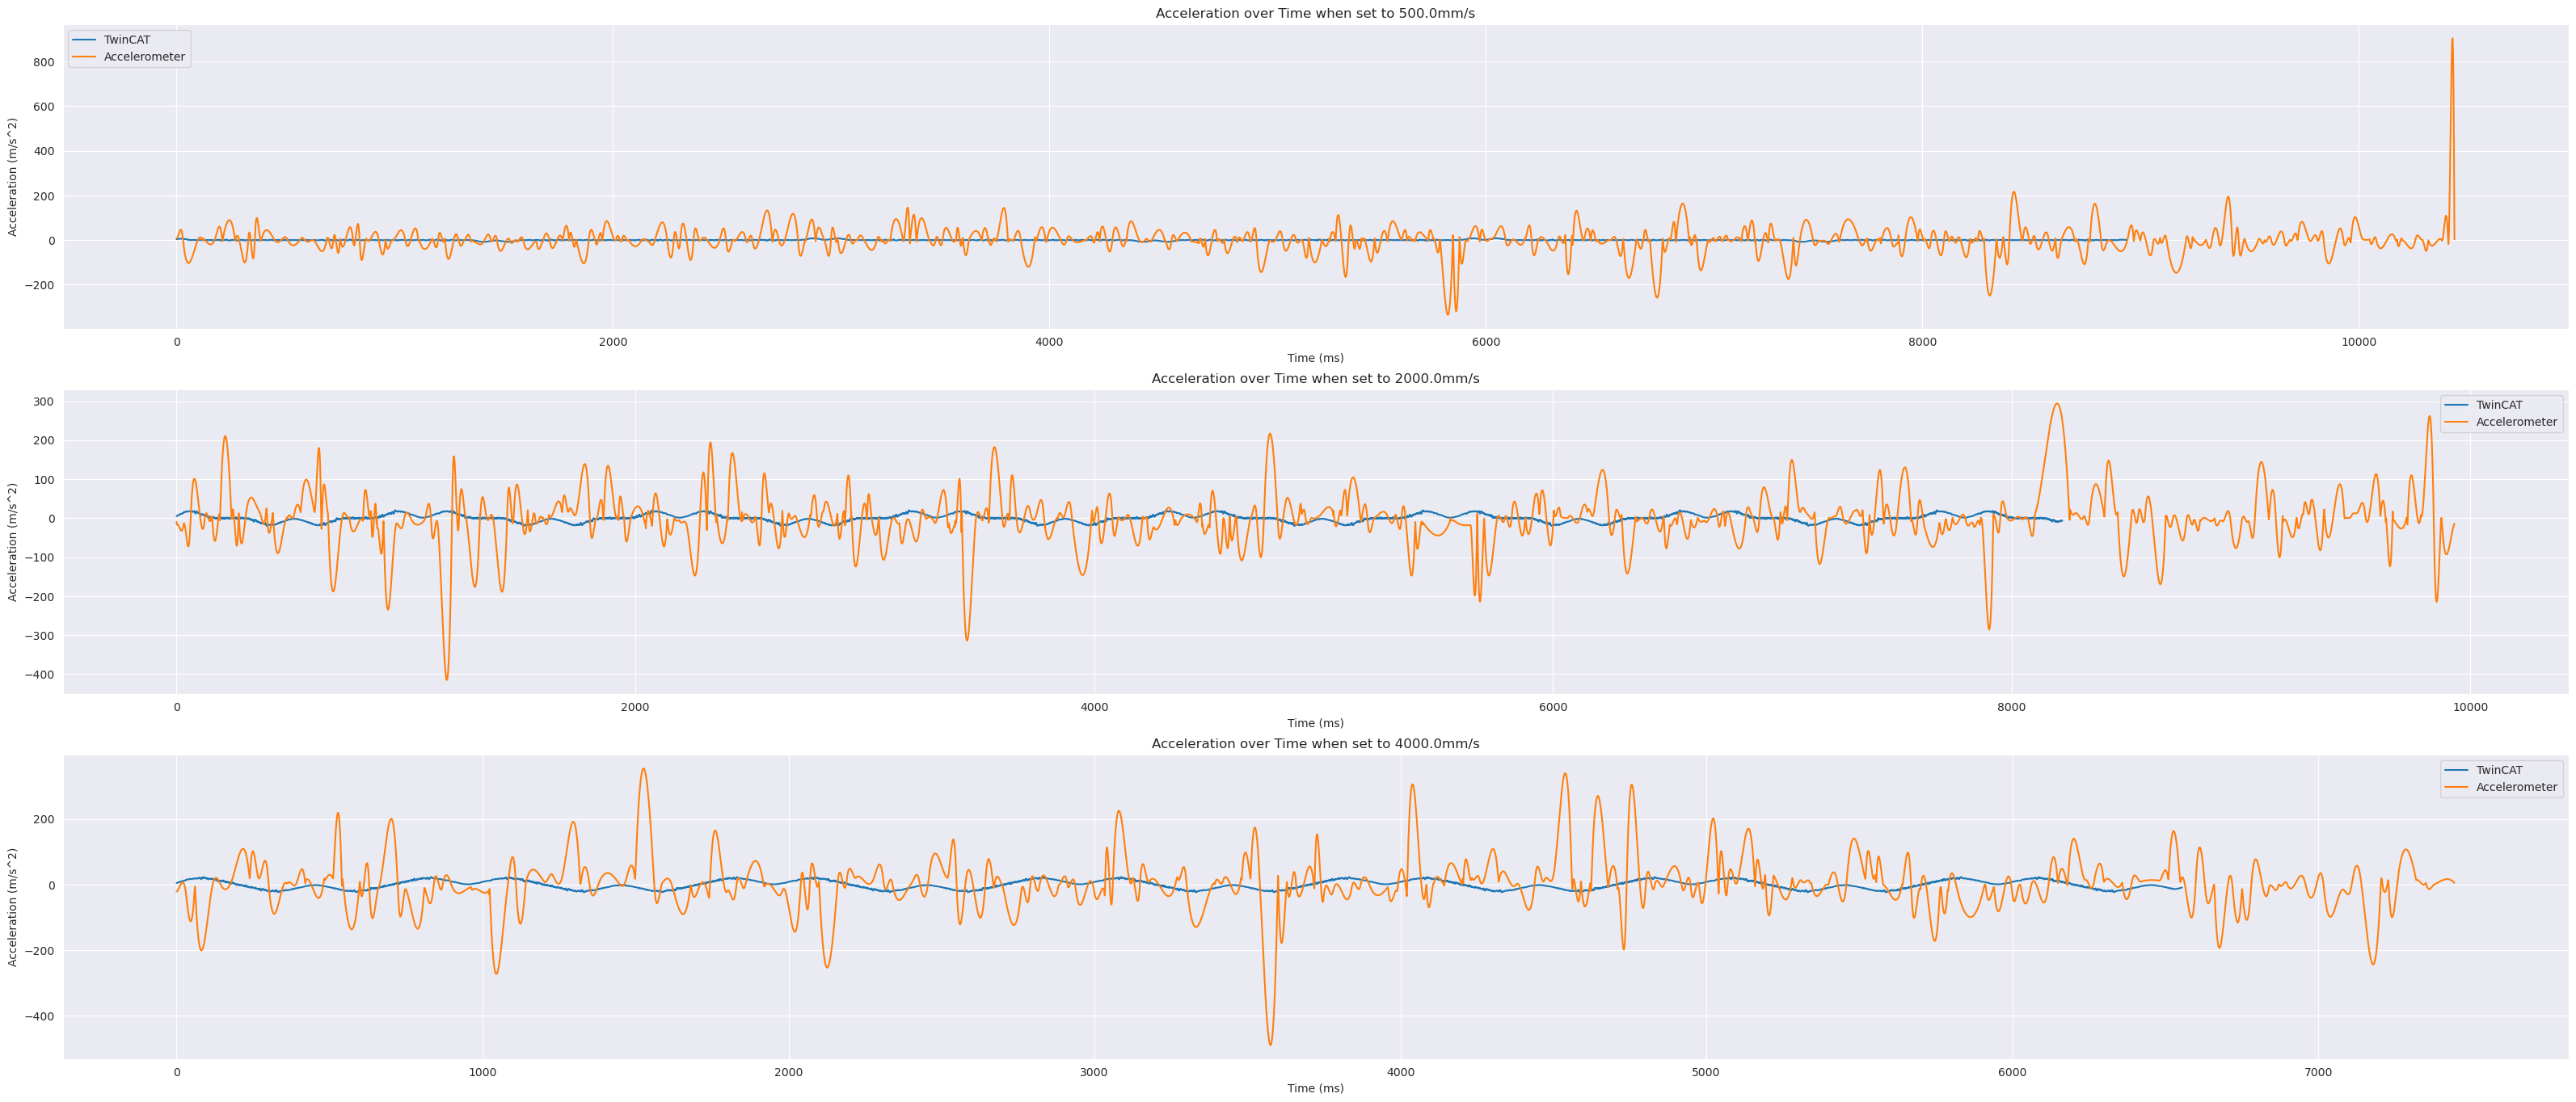

In [ ]:
scaling_factor = 2.5
plt.figure(figsize=(16*scaling_factor,9*scaling_factor))

for i,velocity in enumerate(TwinCAT_velocities):
    plt.subplot(len(TwinCAT_velocities)+1,1,i+1)
    sns.lineplot(data=TwinCAT_dfs[velocity].data, x="Time (ms)", y='Convolved Acceleration m/s^2',label = 'TwinCAT')
    sns.lineplot(data=Accelerometer_dfs[velocity].TC_data,x='Time (ms)', y='Acceleration m/s^2',label = 'Accelerometer')
    
    plt.ylabel("Acceleration (m/s^2)")
    plt.xlabel("Time (ms)")
    plt.legend()
    plt.title('Acceleration over Time when set to {velocity}mm/s'.format(velocity=velocity))